### Лабораторная работа 3

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.utils import shuffle
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_validate

sns.set_style('darkgrid')

In [2]:
# Задание 1

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

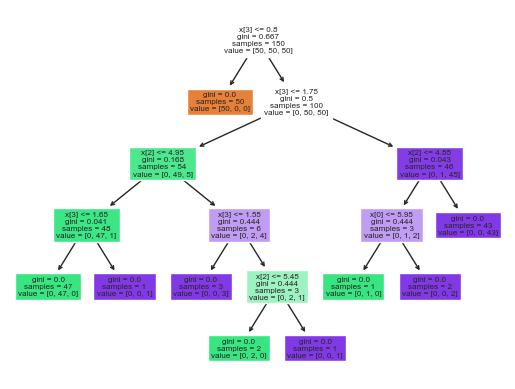

In [3]:
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

tree.plot_tree(clf, filled=True)

In [4]:
# Задание 2

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

target = df.columns[14]
features = [list(df.head(0))[i] for i in [2,4,10,11,12]]
print("target:", target)
print("features:", features)

df.iloc[:5,:]

target: 14
features: [2, 4, 10, 11, 12]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
X = df[features]
y = (df[target] == ' >50K').astype(int)
X, y = shuffle(X, y, random_state=13)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [7]:
X.head(), y.head()

(           2   4     10  11  12
 21345  175262   4     0   0  40
 21943  295991   6     0   0  20
 2430   240521   9  7298   0  40
 5213   236068  10     0   0  20
 8816   186934   9  7688   0  50,
 21345    0
 21943    0
 2430     1
 5213     0
 8816     1
 Name: 14, dtype: int64)

In [8]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=2, random_state=0)
clf = clf.fit(X_train, y_train)

accuracy_baseline = max(1 - y[y==1].count()/y.shape[0], y[y==1].count()/y.shape[0])
accuracy_train = np.array([accuracy_score(y_train, y_pred) for y_pred in clf.staged_predict(X_train)])
accuracy_test = np.array([accuracy_score(y_test, y_pred) for y_pred in clf.staged_predict(X_test)])

print("accuracy (baseline):", accuracy_baseline)
print("accuracy (train):", accuracy_score(y_train, clf.predict(X_train)))
print("accuracy (test):", accuracy_score(y_test, clf.predict(X_test)))

accuracy (baseline): 0.7591904425539756
accuracy (train): 0.8477652991061196
accuracy (test): 0.8376139959054532


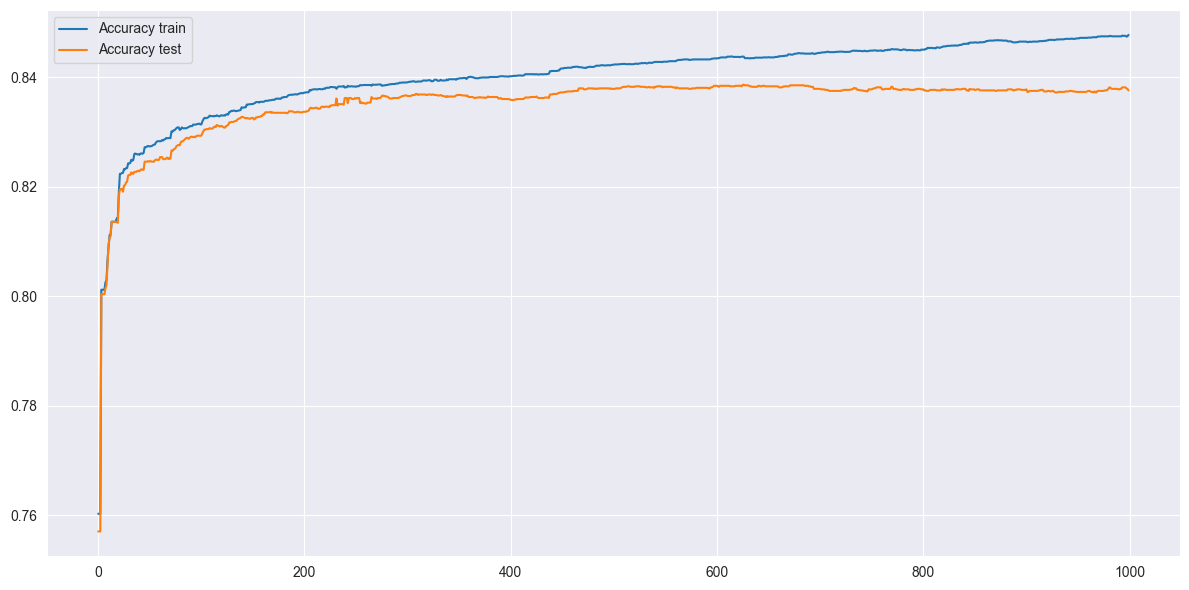

In [9]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax.plot(accuracy_train, label = 'Accuracy train')
ax.plot(accuracy_test, label = 'Accuracy test')

ax.legend()

plt.tight_layout()
plt.show()

[Text(0.5, 0.8333333333333334, 'x[3] <= 2364.5\nfriedman_mse = 0.124\nsamples = 21815\nvalue = -0.0'),
 Text(0.25, 0.5, 'x[3] <= 1978.5\nfriedman_mse = 0.124\nsamples = 21717\nvalue = -0.001'),
 Text(0.125, 0.16666666666666666, 'friedman_mse = 0.124\nsamples = 21565\nvalue = 0.005'),
 Text(0.375, 0.16666666666666666, 'friedman_mse = 0.113\nsamples = 152\nvalue = -0.973'),
 Text(0.75, 0.5, 'x[3] <= 2581.0\nfriedman_mse = 0.086\nsamples = 98\nvalue = 0.13'),
 Text(0.625, 0.16666666666666666, 'friedman_mse = 0.084\nsamples = 77\nvalue = 1.08'),
 Text(0.875, 0.16666666666666666, 'friedman_mse = 0.059\nsamples = 21\nvalue = -0.256')]

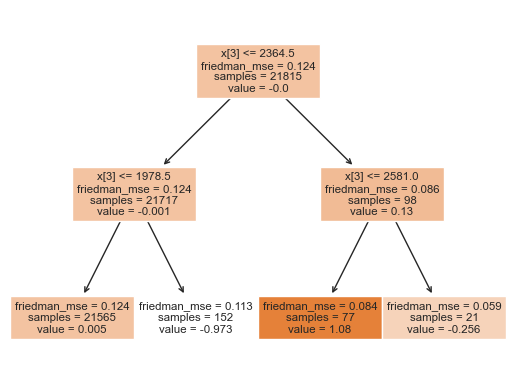

In [10]:
trees_per_iteration = clf.estimators_
tree.plot_tree(*trees_per_iteration[74], filled=True)

In [11]:
#значимость переменных
importance = clf.feature_importances_
importance_out = pd.DataFrame()
importance_out['feature_name'] = X.columns
importance_out['importance'] = importance
importance_out.sort_values('importance', ascending=False).head(5)

,feature_name,importance
2,10,0.409875
1,4,0.258674
3,11,0.142722
4,12,0.120455
0,2,0.068274


In [12]:
def cross_val(X_train, y_train, model, num_folds = 5):
    X_train_folds = np.array_split(X_train, num_folds)
    y_train_folds = np.array_split(y_train, num_folds)

    scores = []
    for i in range(num_folds):
        X_val = X_train_folds[i]
        y_val = y_train_folds[i]
        X_tr = np.vstack(X_train_folds[:i] + X_train_folds[i+1:])
        y_tr = np.vstack(y_train_folds[:i] + y_train_folds[i+1:]).ravel()

        model.fit(X_tr, y_tr)
        scores.append(model.score(X_val, y_val))

    return np.array(scores)

In [14]:
N = list(range(1, 20))

scores = []
scores_cv = []
for n in N:
    model = GradientBoostingClassifier(n_estimators=50,
                                       learning_rate=0.1,
                                       max_depth=int(np.log2(n+1))+1,
                                       min_samples_leaf = n,
                                       max_leaf_nodes = n+1)

    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

    score = cross_val(X_train.values, y_train.values, model)
    scores_cv.append(score)

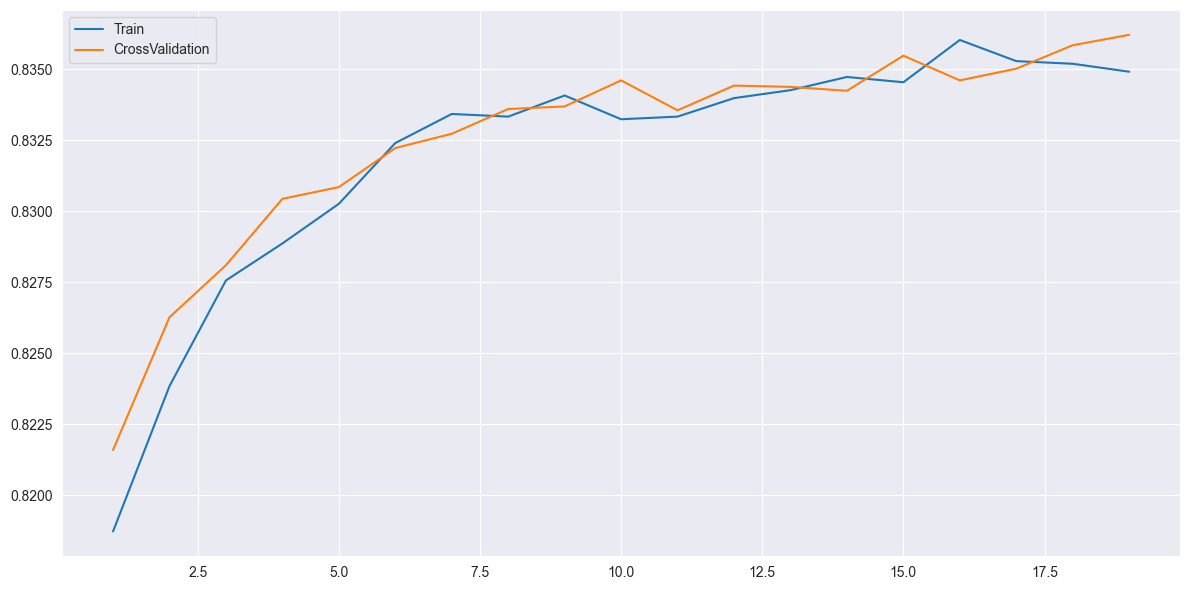

In [15]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax.plot(N, scores, label = 'Train')
ax.plot(N, np.mean(scores_cv, axis = 1), label = 'CrossValidation')

ax.legend()

plt.tight_layout()
plt.show()

In [16]:
# Задание 4

In [59]:
N_est = 400
N_depth = list(range(1, 10))
scores_GBC = {}

for depth in N_depth:
    clf = GradientBoostingClassifier(n_estimators=N_est,
                                     learning_rate=0.1,
                                     max_depth=depth,
                                     random_state=0)
    clf = clf.fit(X_train, y_train)
    scores_GBC[depth] = [accuracy_score(y_test, y_pred) for y_pred in clf.staged_predict(X_test)]

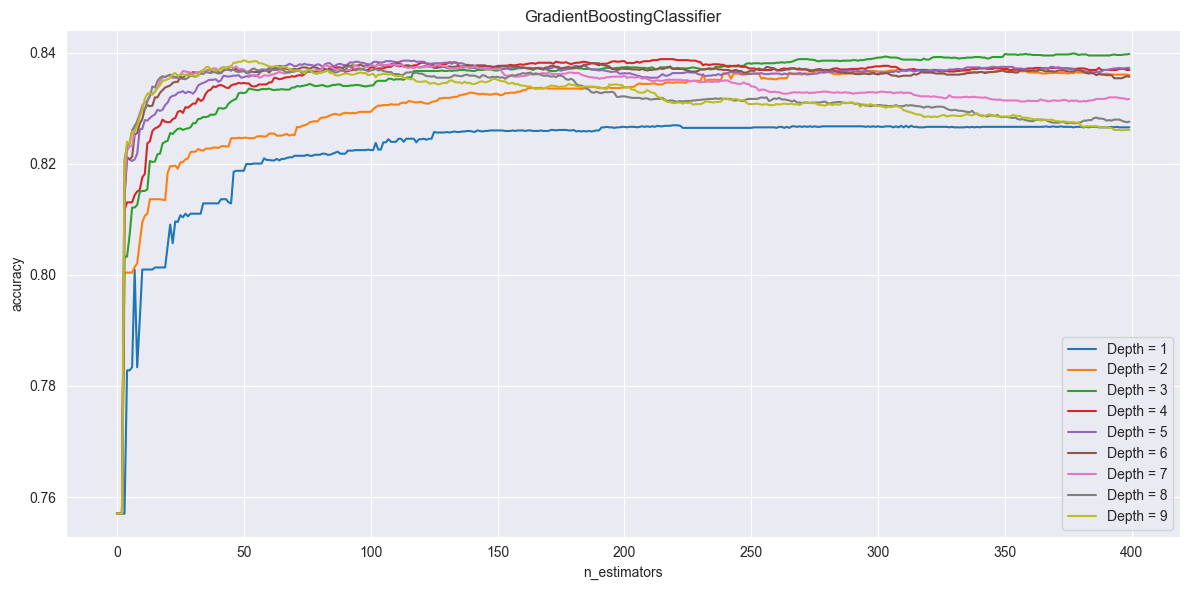

In [60]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

for depth, scores in scores_GBC.items():
    ax.plot(scores, label = f'Depth = {depth}')

ax.set_xlabel('n_estimators')
ax.set_ylabel('accuracy')
ax.legend()
plt.title("GradientBoostingClassifier")

plt.tight_layout()
plt.show()

In [61]:
max_score = 0
opt_depth, opt_n_est = 1, 1


for depth, scores in scores_GBC.items():
    if np.max(scores) > max_score:
        max_score = np.max(scores)
        opt_depth = depth
        opt_n_est = np.argmax(scores)

print(f"Optimal depth: {opt_depth}")
print(f"Optimal n_estimators: {opt_n_est}")
print(f"best_accuracy: {max_score}")

Optimal depth: 3
Optimal n_estimators: 377
best_accuracy: 0.8398473850735158


In [19]:
# Задание 5

In [17]:
N_est = list(range(10, 100, 10))
N_depth = list(range(1, 50, 10))
scores_RFC = {}

for depth in N_depth:
    scores_RFC[depth] = []
    for n_estimators in N_est:
        clf = RandomForestClassifier(n_estimators=n_estimators,
                                    max_depth=depth,
                                    n_jobs=3,
                                    random_state=0)
        clf = clf.fit(X_train, y_train)
        scores_RFC[depth].append(accuracy_score(y_test, clf.predict(X_test)))

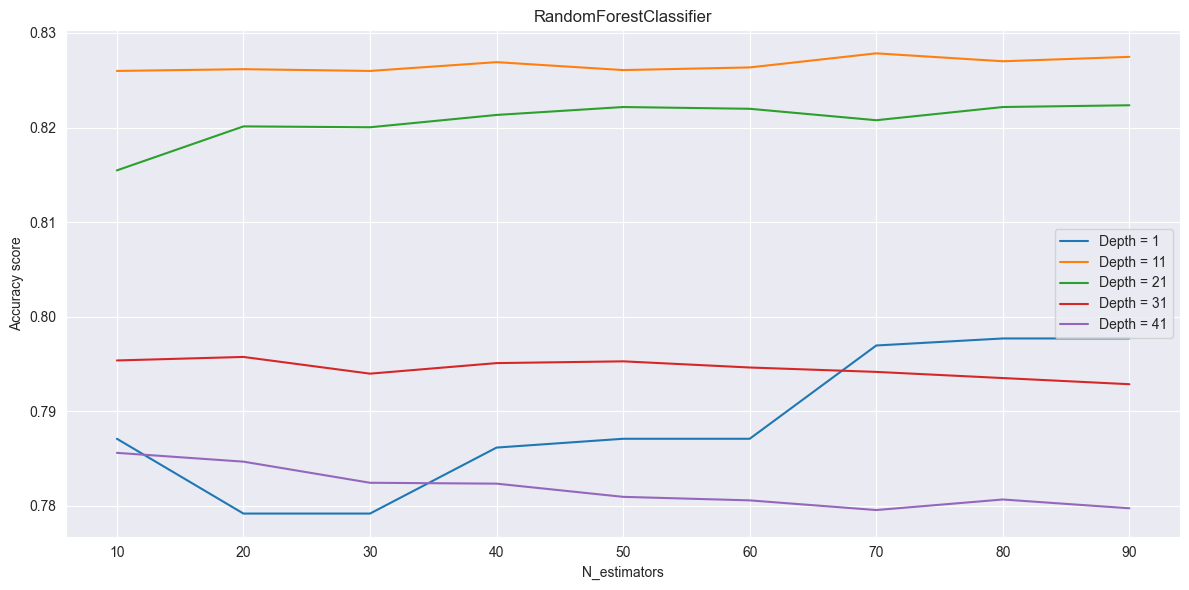

In [18]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

for depth, scores in scores_RFC.items():
    ax.plot(N_est, scores, label = f'Depth = {depth}')

ax.legend()
plt.title("RandomForestClassifier")
plt.xlabel("N_estimators")
plt.ylabel("Accuracy score")

plt.tight_layout()
plt.show()

In [19]:
max_score = 0
opt_depth, opt_n_est = 1, 1

for depth, scores in scores_RFC.items():
    if np.max(scores) > max_score:
        max_score = np.max(scores)
        opt_n_est = np.argmax(scores)
        opt_depth = depth

print(f"Optimal depth: {opt_depth}")
print(f"Optimal n_estimators: {opt_n_est}")
print(f"best_accuracy: {max_score}")

Optimal depth: 11
Optimal n_estimators: 6
best_accuracy: 0.8278429182951796
